In [1]:
import sys 
sys.path.append("/home/dongjguo/Documents/immunoMatch_review/")
from run_immunomatch import *


import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

/home/dongjguo/.conda/envs/abty_n/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Get the ImmunoMatch pairing scores for all the single cell data in [Engblom et al. Science 2023](https://www.science.org/doi/10.1126/science.adf8486)

In [2]:
single_cell_data=pd.read_csv("20220309_BCSA23_Bcell_filtered_contig_annotations.csv")

single_cell_data["aa_sequence"]=single_cell_data["fwr1"]+single_cell_data["cdr1"]+single_cell_data["fwr2"]+single_cell_data["cdr2"]+single_cell_data["fwr3"]+single_cell_data["cdr3"]+single_cell_data["fwr4"]

# Get the H-L pairs based on the cell barcode
single_cell_data_H=single_cell_data[single_cell_data["chain"]=="IGH"]
single_cell_data_L=single_cell_data[single_cell_data["chain"]!="IGH"]
## Get the barcode for L chains that only appear once
single_cell_data_L_single=single_cell_data_L.loc[single_cell_data_L["barcode"].isin(single_cell_data_L["barcode"].value_counts()[single_cell_data_L["barcode"].value_counts()==1].index)]
len(single_cell_data_L_single)
## Get the barcode for H chains that only appear once
single_cell_data_H_single=single_cell_data_H.loc[single_cell_data_H["barcode"].isin(single_cell_data_H["barcode"].value_counts()[single_cell_data_H["barcode"].value_counts()==1].index)]
len(single_cell_data_H_single)
## Get the H-L pairs based on the unique cell barcode
single_cell_data_paired=pd.merge(single_cell_data_H_single, single_cell_data_L_single, on="barcode", suffixes=('_H', '_L'),how="inner")

In [3]:
single_cell_data_paired_scores=run_immunomatch_batches(single_cell_data_paired,'aa_sequence_H','aa_sequence_L','chain_L')
single_cell_data_paired_scores

Generating test split: 749 examples [00:00, 17776.40 examples/s]
Map: 100%|██████████| 749/749 [00:01<00:00, 622.60 examples/s]


Generating test split: 577 examples [00:00, 12455.17 examples/s]
Map: 100%|██████████| 577/577 [00:00<00:00, 625.31 examples/s]


,barcode,is_cell_H,contig_id_H,high_confidence_H,length_H,chain_H,v_gene_H,d_gene_H,j_gene_H,c_gene_H,...,fwr4_nt_L,reads_L,umis_L,raw_clonotype_id_L,raw_consensus_id_L,exact_subclonotype_id_L,donor_L,origin_L,aa_sequence_L,pairing_scores
0,AACACGTAGTGAACAT-1,True,AACACGTAGTGAACAT-1_contig_2,True,586,IGH,IGHV3-74,IGHD2-15,IGHJ3,IGHM,...,GGCGGAGGGACCAAGCTGACCGTCCTAG,9,4,clonotype1043,clonotype1043_consensus_2,1,BCSA2,BCSA2_1,SYELTQPPSVSVSPGQTASITCSGDKLGDKYACWYQQKPGQSPVLV...,0.527669
0,AAACCTGCACATTTCT-1,True,AAACCTGCACATTTCT-1_contig_1,True,620,IGH,IGHV4-59,NaN,IGHJ3,IGHG1,...,GGCCAGGGGACCAAGGTGGAAATCAAAC,1433,520,clonotype34,clonotype34_consensus_2,1,BCSA2,BCSA2_1,EIVLTQSPDFQSVTPKEKITITCRASQSIGSSLHWYQQKPDQSPKL...,0.953057
1,AACACGTGTCTCAACA-1,True,AACACGTGTCTCAACA-1_contig_1,True,675,IGH,IGHV3-33,NaN,IGHJ6,IGHA2,...,GGCGGAGGGACCAGGCTGACCGTCCTAG,2667,1009,clonotype944,clonotype944_consensus_2,1,BCSA2,BCSA2_1,QSVLTQPPSVSGAPGQRVTLSCTGSSSNTGAGYDVHWYQQVPGTAP...,0.647024
1,AAACGGGCAAGCTGAG-1,True,AAACGGGCAAGCTGAG-1_contig_2,True,662,IGH,IGHV3-33,NaN,IGHJ5,IGHG1,...,GGCCAGGGGACCAAGCTGGAGATCAAAC,2401,1027,clonotype52,clonotype52_consensus_2,1,BCSA2,BCSA2_1,DIQMTQSPSSLSASVGDRVTITCRASQGISNYLAWFQQKPGKAPKS...,0.869061
2,AAATGCCCAATGCCAT-1,True,AAATGCCCAATGCCAT-1_contig_2,True,689,IGH,IGHV3-64D,NaN,IGHJ6,IGHA1,...,GGCCAAGGGACACGACTGGAGATTAAAG,18958,7811,clonotype2,clonotype2_consensus_2,2,BCSA2,BCSA2_1,EIVMTQSPATLSVSPGERATLSCRASQSIDTYLAWYQQKPGQAPRL...,0.942592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,TTCCCAGTCTCTGAGA-4,True,TTCCCAGTCTCTGAGA-4_contig_1,True,559,IGH,IGHV3-66,NaN,IGHJ4,IGHM,...,GGCCAAGGGACCAAGGTGGAAATCAAAC,4362,29,clonotype275,clonotype275_consensus_2,1,BCSA3,BCSA3_2,AIQMTQSPSSLSASVGDRVTITCRASQGIRNDLGWYQQKPGKAPKL...,0.951051
745,TTCTTAGAGCGTGAGT-4,True,TTCTTAGAGCGTGAGT-4_contig_2,True,565,IGH,IGHV3-23,NaN,IGHJ4,IGHM,...,GGCCAAGGGACCAAGGTGGAAATCAAAC,6396,48,clonotype69,clonotype69_consensus_2,1,BCSA3,BCSA3_2,EIVLTQSPGTLSLSPGERGTLSCRASQSVSTTYLAWYQQKPGQAPR...,0.981332
746,TTGCGTCCAAAGGTGC-4,True,TTGCGTCCAAAGGTGC-4_contig_1,True,661,IGH,IGHV3-66,NaN,IGHJ4,IGHG2,...,GGCCAAGGGACCCAGGTGGAAATCAAAC,2366,16,clonotype222,clonotype222_consensus_2,1,BCSA3,BCSA3_2,DIQMTQSPSTLSASVGDRVTITCRASQSIDSWLAWYQQKPGKAPKV...,0.910969
747,TTTCCTCAGGCAGGTT-4,True,TTTCCTCAGGCAGGTT-4_contig_1,True,527,IGH,IGHV4-59,IGHD3-22,IGHJ4,IGHM,...,GGCCAAGGGACCAAGGTGGAAATCAAAC,5090,35,clonotype521,clonotype521_consensus_2,1,BCSA3,BCSA3_2,DIQMTQSPSSLSASVGDRVTITCRASQSISSYLNWYQQKPGKAPKL...,0.689273


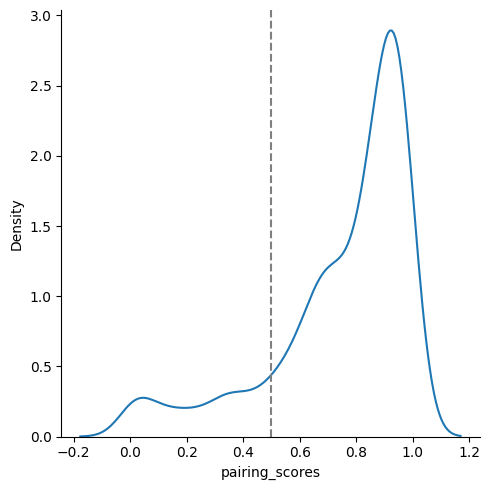

In [4]:
sns.displot(data=single_cell_data_paired_scores, x='pairing_scores', kind="kde")
plt.axvline(x=0.5, color='grey', linestyle='--')
plt.show()

Therefore, ImmunoMatch successfully identified most H-L pairs in the single cell data [Engblom et al. Science 2023](https://www.science.org/doi/10.1126/science.adf8486).

# Comparison of ImmunoMatch pairing scores versus the 'repair scores' from [Engblom et al. <i>Science 2023</i>](https://www.science.org/doi/10.1126/science.adf8486)

## Get the ImmunoMatch pairing scores for the H-L pairs which <i>Engblom et al.</i> is trying to repair

In [5]:
p1_data=pd.read_csv("P1_repair_results_with_sequences.csv")
p2_data=pd.read_csv("P2_repair_results_with_sequences.csv")

# Drop rows if any of VH or VL is NaN
p1_data = p1_data.dropna(subset=['VH', 'VL'])
p2_data = p2_data.dropna(subset=['VH', 'VL'])

p1_data=p1_data.rename(columns={"chainB":"l_chain_clone","chainA":"h_chain_clone"})
p2_data=p2_data.rename(columns={"chainB":"l_chain_clone","chainA":"h_chain_clone"})
p1_data["donor_id"]="P1"
p2_data["donor_id"]="P2"

# Combine the two datasets together
non_single_data=pd.concat([p1_data,p2_data],axis=0)
non_single_data["L_locus"]=non_single_data["l_chain_clone"].apply(lambda x: x[0:3])

non_single_data=non_single_data.reset_index(drop=True)
non_single_data

,l_chain_clone,h_chain_clone,X,score,CDRH3,VH,CDRL3,VL,donor_id,L_locus
0,IGLCclone0,IGHGclone1,Pair_0,0.545664,CARASYDTLTTW,QLQLQESGPGLVKPSETLSLTCDVSGFSISSGYYWDWIRQPPGKGL...,CISRDRSGDRWVF,SSELTQDPAVSVALGQTVRITCQGDSLRTFNAGWYQQKPRQAPVLI...,P1,IGL
1,IGLCclone0,IGHGclone1,Pair_0,0.545664,CARASYDTLTTW,QLQLQESGPGLVKPSETLSLTCDVSGFSISSGYYWDWIRQPPGKGL...,CISRDRSGDRWVF,SSELTQDPAVSVALGQTVRITCQGDSLRTFNAGWYQQKPRQAPVLI...,P1,IGL
2,IGLCclone0,IGHGclone1,Pair_0,0.545664,CARASYDTLTTW,QLQLQESGPGLVKPSETLSLTCDVSGFSISSGYYWDWIRQPPGKGL...,CISRDRSGDRWVF,SSELTQDPAVSVALGQTVRITCQGDSLRTFNAGWYQQKPRQAPVLI...,P1,IGL
3,IGLCclone0,IGHGclone1,Pair_0,0.545664,CARASYDTLTTW,QLQLQESGPGLVKPSETLSLTCDVSGFSISSGYYWDWIRQPPGKGL...,CISRDRSGDRWVF,SSELTQDPAVSVALGQTVRITCQGDSLRTFNAGWYQQKPRQAPVLI...,P1,IGL
4,IGLCclone0,IGHGclone1,Pair_0,0.545664,CARASYDTLTTW,QLQLQESGPGLVKPSETLSLTCDVSGFSISSGYYWDWIRQPPGKGL...,CISRDRSGDRWVF,SSELTQDPAVSVALGQTVRITCQGDSLRTFNAGWYQQKPRQAPVLI...,P1,IGL
...,...,...,...,...,...,...,...,...,...,...
255,IGKCclone153,IGHAclone181,Pair_267,0.604305,CAKGGRYCSPGSCYSDYW,EVQLVESGGGLVKPGGSLRLSCAASGFAFSTYTMNWVRQAPGKGLE...,CQQYGSSPLTF,EIVLTQSPGTLSLSPGERATLSCRASQSVSSNYLAWLQQKPGQAPR...,P1,IGK
256,IGKCclone153,IGHAclone181,Pair_267,0.604305,CAKGGRYCSPGSCYSDYW,EVQLVESGGGLVKPGGSLRLSCAASGFAFSTYTMNWVRQAPGKGLE...,CQQYGSSPLTF,EIVLTQSPGTLSLSPGERATLSCRASQSVSSNYLAWLQQKPGQAPR...,P1,IGK
257,IGKCclone289,IGHGclone514,Pair_274,0.609528,CAKSARTIVGGVIATPFDFW,EVQLLESGGGLIRPGGSLRLSCAASGVTVSGTHMSWVRQAPGKGLE...,CQQYGDSVWTF,EIVLTQSPGTLSLSPGERATLSCRTSQYLSTAYLAWYQQKPGQAPR...,P1,IGK
258,IGKCclone15,IGHMclone33,Pair_2,0.438960,CASRGLTVVPVW,QLQLQESGPGLVKPSETLSLVCTVSGDSISSSSYYWVWIRQPPGKG...,CMQALHNPLTF,DIVMTQSPLSLPVTPGEPASISCRSSQSLLFSNGFHYLDWYLQKPG...,P2,IGK


In [6]:
non_single_data_pairing_result=run_immunomatch_batches(non_single_data,"h_chain_clone","l_chain_clone","L_locus")
non_single_data_pairing_result

Generating test split: 55 examples [00:00, 5168.52 examples/s]
Map: 100%|██████████| 55/55 [00:00<00:00, 985.31 examples/s]


Generating test split: 205 examples [00:00, 21750.29 examples/s]
Map: 100%|██████████| 205/205 [00:00<00:00, 2464.03 examples/s]


,l_chain_clone,h_chain_clone,X,score,CDRH3,VH,CDRL3,VL,donor_id,L_locus,pairing_scores
0,IGLCclone0,IGHGclone1,Pair_0,0.545664,CARASYDTLTTW,QLQLQESGPGLVKPSETLSLTCDVSGFSISSGYYWDWIRQPPGKGL...,CISRDRSGDRWVF,SSELTQDPAVSVALGQTVRITCQGDSLRTFNAGWYQQKPRQAPVLI...,P1,IGL,0.380851
0,IGKCclone7,IGHGclone21,Pair_4,0.385526,CARDGFRLGELLLW,QEQLVQSGAEVKRPGASVKVSCETSGYNMMSYYMHWVRQAPGQGLE...,CQQYSPWPPAFTF,EIVMTQSPATLSVSPGERATLSCRASQSVRSSLAWYQHKPGQAPRL...,P1,IGK,0.563982
1,IGLCclone0,IGHGclone1,Pair_0,0.545664,CARASYDTLTTW,QLQLQESGPGLVKPSETLSLTCDVSGFSISSGYYWDWIRQPPGKGL...,CISRDRSGDRWVF,SSELTQDPAVSVALGQTVRITCQGDSLRTFNAGWYQQKPRQAPVLI...,P1,IGL,0.380851
1,IGKCclone7,IGHGclone21,Pair_4,0.385526,CARDGFRLGELLLW,QEQLVQSGAEVKRPGASVKVSCETSGYNMMSYYMHWVRQAPGQGLE...,CQQYSPWPPAFTF,EIVMTQSPATLSVSPGERATLSCRASQSVRSSLAWYQHKPGQAPRL...,P1,IGK,0.563982
2,IGLCclone0,IGHGclone1,Pair_0,0.545664,CARASYDTLTTW,QLQLQESGPGLVKPSETLSLTCDVSGFSISSGYYWDWIRQPPGKGL...,CISRDRSGDRWVF,SSELTQDPAVSVALGQTVRITCQGDSLRTFNAGWYQQKPRQAPVLI...,P1,IGL,0.380851
...,...,...,...,...,...,...,...,...,...,...,...
200,IGLCclone53,IGHGclone217,Pair_192,0.512939,CARLFQRGYSPDSAFLYW,QVQLVQSGPEVRKPGSSVNVSCQASGDTFDVYAINWVRQAPGQGLE...,CQSYDSSLSAWVF,QPVLTQPPSVSGAPGQRVTISCTGSNSNIGAGFDVHWYQQPTGTAP...,P1,IGL,0.232382
201,IGLCclone53,IGHGclone217,Pair_192,0.512939,CARLFQRGYSPDSAFLYW,QVQLVQSGPEVRKPGSSVNVSCQASGDTFDVYAINWVRQAPGQGLE...,CQSYDSSLSAWVF,QPVLTQPPSVSGAPGQRVTISCTGSNSNIGAGFDVHWYQQPTGTAP...,P1,IGL,0.232382
202,IGLCclone53,IGHGclone217,Pair_192,0.512939,CARLFQRGYSPDSAFLYW,QVQLVQSGPEVRKPGSSVNVSCQASGDTFDVYAINWVRQAPGQGLE...,CQSYDSSLSAWVF,QPVLTQPPSVSGAPGQRVTISCTGSNSNIGAGFDVHWYQQPTGTAP...,P1,IGL,0.232382
203,IGLCclone53,IGHGclone217,Pair_192,0.512939,CARLFQRGYSPDSAFLYW,QVQLVQSGPEVRKPGSSVNVSCQASGDTFDVYAINWVRQAPGQGLE...,CQSYDSSLSAWVF,QPVLTQPPSVSGAPGQRVTISCTGSNSNIGAGFDVHWYQQPTGTAP...,P1,IGL,0.232382


In [7]:
non_single_data_repair_df=[]

for donor,df in non_single_data_pairing_result.groupby(["donor_id"]):
    this_donor=donor
    for name,group in df.groupby(["CDRH3","CDRL3"]):
        repair_scores=group["score"].unique()
        h_clone=group["h_chain_clone"].unique()
        l_clone=group["l_chain_clone"].unique()
        if len(repair_scores)==1 and len(h_clone)==1 and len(l_clone)==1:
            pairing_score_mean = group["pairing_scores"].mean() # Mean pairing score from ImmunoMatch
            pairing_score_std = group["pairing_scores"].std() # Std pairing score from ImmunoMatch
            
            this_row={
                "donor_id":this_donor,
                "CDRH3":name[0],
                "CDRL3":name[1],
                "h_chain_clone":h_clone[0],
                "l_chain_clone":l_clone[0],
                "repair_scores":repair_scores[0],
                "L_locus":l_clone[0][0:3],
                "pairing_scores": pairing_score_mean,
                "pairing_score_std": pairing_score_std
            }
            non_single_data_repair_df.append(this_row)
        else:
            print(f"Multiple scores or clones found for {name} in {this_donor}: {repair_scores}, {h_clone}, {l_clone}")
non_single_data_repair_df=pd.DataFrame(non_single_data_repair_df)

/tmp/ipykernel_179809/4069943248.py:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for donor,df in non_single_data_pairing_result.groupby(["donor_id"]):


In [8]:
non_single_data_repair_df

,donor_id,CDRH3,CDRL3,h_chain_clone,l_chain_clone,repair_scores,L_locus,pairing_scores,pairing_score_std
0,P1,CAGGTTGGFDIW,CQQYNTYPPTF,IGHMclone43,IGKCclone65,0.308757,IGK,0.191431,0.000000e+00
1,P1,CAHRPVAARDAFDFW,CQHSYNTPITF,IGHAclone237,IGKCclone579,0.575525,IGK,0.158471,0.000000e+00
2,P1,CAKGGRYCSPGSCYSDYW,CQQYGSSPLTF,IGHAclone181,IGKCclone153,0.604305,IGK,0.158471,0.000000e+00
3,P1,CAKLVGATEWLPDRGSDHW,CHQYGTSPRTF,IGHGclone116,IGKCclone50,0.446628,IGK,0.252068,0.000000e+00
4,P1,CAKSARTIVGGVIATPFDFW,CQQYGDSVWTF,IGHGclone514,IGKCclone289,0.609528,IGK,0.349262,NaN
5,P1,CARASYDTLTTW,CISRDRSGDRWVF,IGHGclone1,IGLCclone0,0.545664,IGL,0.380851,0.000000e+00
6,P1,CARDAILVREYYYYYMDVW,CQAWVSSTVVF,IGHGclone91,IGLCclone11,0.519538,IGL,0.468668,0.000000e+00
7,P1,CARDGFRLGELLLW,CQQYSPWPPAFTF,IGHGclone21,IGKCclone7,0.385526,IGK,0.563982,0.000000e+00
8,P1,CARDSQRPGYYYYYMDVW,CQQSYSTPRTF,IGHMclone126,IGKCclone35,0.543594,IGK,0.271429,NaN
9,P1,CARDVSSTDDSSSSVIIRWFDPW,CQQSYSTPRTF,IGHMclone172,IGKCclone753,0.187619,IGK,0.349155,0.000000e+00


## Fetch the repair scores to single cell data

In [9]:
p1_single_cell=single_cell_data_paired_scores[single_cell_data_paired_scores["donor_H"]=="BCSA2"]
p2_single_cell=single_cell_data_paired_scores[single_cell_data_paired_scores["donor_H"]=="BCSA3"]

p1_data_repair_df=non_single_data_repair_df[non_single_data_repair_df["donor_id"]=="P1"]
p2_data_repair_df=non_single_data_repair_df[non_single_data_repair_df["donor_id"]=="P2"]

# Fetch the repair scores for P1 and P2
p1_single_cell_repair=pd.merge(p1_single_cell,p1_data_repair_df,left_on=["cdr3_H","cdr3_L"],right_on=["CDRH3","CDRL3"],how="inner",suffixes=('', '_repair'))
p2_single_cell_repair=pd.merge(p2_single_cell,p2_data_repair_df,left_on=["cdr3_H","cdr3_L"],right_on=["CDRH3","CDRL3"],how="inner",suffixes=('', '_repair'))

single_cell_data_repair=pd.concat([p1_single_cell_repair,p2_single_cell_repair],axis=0)



In [10]:
single_cell_data_repair

,barcode,is_cell_H,contig_id_H,high_confidence_H,length_H,chain_H,v_gene_H,d_gene_H,j_gene_H,c_gene_H,...,pairing_scores,donor_id,CDRH3,CDRL3,h_chain_clone,l_chain_clone,repair_scores,L_locus,pairing_scores_repair,pairing_score_std
0,ACACCCTTCACGAAGG-1,True,ACACCCTTCACGAAGG-1_contig_1,True,721,IGH,IGHV4-39,IGHD3-22,IGHJ4,IGHG1,...,0.922785,P1,CARPYYYDSSAYYYFDYW,CQQYTSYATF,IGHGclone133,IGKCclone60,0.456362,IGK,0.252068,0.0
1,ACGAGGAAGCCGATTT-1,True,ACGAGGAAGCCGATTT-1_contig_2,True,654,IGH,IGHV4-39,IGHD3-22,IGHJ4,IGHG1,...,0.922785,P1,CARPYYYDSSAYYYFDYW,CQQYTSYATF,IGHGclone133,IGKCclone60,0.456362,IGK,0.252068,0.0
2,CATCAGATCGCATGAT-1,True,CATCAGATCGCATGAT-1_contig_1,True,654,IGH,IGHV4-39,IGHD3-22,IGHJ4,IGHG1,...,0.922785,P1,CARPYYYDSSAYYYFDYW,CQQYTSYATF,IGHGclone133,IGKCclone60,0.456362,IGK,0.252068,0.0
3,CTAACTTAGAGTAATC-1,True,CTAACTTAGAGTAATC-1_contig_1,True,708,IGH,IGHV4-39,IGHD3-22,IGHJ4,IGHG1,...,0.922785,P1,CARPYYYDSSAYYYFDYW,CQQYTSYATF,IGHGclone133,IGKCclone60,0.456362,IGK,0.252068,0.0
4,CTGTTTAAGTCCAGGA-1,True,CTGTTTAAGTCCAGGA-1_contig_1,True,660,IGH,IGHV4-39,IGHD3-22,IGHJ4,IGHG1,...,0.922785,P1,CARPYYYDSSAYYYFDYW,CQQYTSYATF,IGHGclone133,IGKCclone60,0.456362,IGK,0.252068,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,TTGTAGGCAGCTGTGC-1,True,TTGTAGGCAGCTGTGC-1_contig_2,True,696,IGH,IGHV3-33,NaN,IGHJ6,IGHG3,...,0.863771,P1,CARDAILVREYYYYYMDVW,CQAWVSSTVVF,IGHGclone91,IGLCclone11,0.519538,IGL,0.468668,0.0
80,TAGGCATGTTATCGGT-2,True,TAGGCATGTTATCGGT-2_contig_2,True,731,IGH,IGHV3-33,NaN,IGHJ6,IGHG3,...,0.863771,P1,CARDAILVREYYYYYMDVW,CQAWVSSTVVF,IGHGclone91,IGLCclone11,0.519538,IGL,0.468668,0.0
81,TTGTAGGCAGCTGTGC-2,True,TTGTAGGCAGCTGTGC-2_contig_2,True,731,IGH,IGHV3-33,NaN,IGHJ6,IGHG3,...,0.863771,P1,CARDAILVREYYYYYMDVW,CQAWVSSTVVF,IGHGclone91,IGLCclone11,0.519538,IGL,0.468668,0.0
82,TACTCATGTAGTGAAT-1,True,TACTCATGTAGTGAAT-1_contig_1,True,685,IGH,IGHV3-21,NaN,IGHJ4,IGHG1,...,0.402941,P1,CARSRLNDYMAYYFDYW,CQQYNSYSRTF,IGHGclone230,IGKCclone204,0.445630,IGK,0.349262,0.0


# Combine the single cell data with the non-single-cell data together for analysis

In [11]:
single_cell_data_analysis=single_cell_data_repair.loc[:,["pairing_scores","repair_scores"]]
non_single_cell_data_analysis=non_single_data_repair_df.loc[:,["pairing_scores","repair_scores"]]

single_cell_data_analysis["Overlap with single cell data?"]=True
non_single_cell_data_analysis["Overlap with single cell data?"]=False

all_data_analysis=pd.concat([single_cell_data_analysis,non_single_cell_data_analysis],axis=0)

In [12]:
len(single_cell_data_analysis),len(non_single_cell_data_analysis),len(all_data_analysis)

(84, 28, 112)

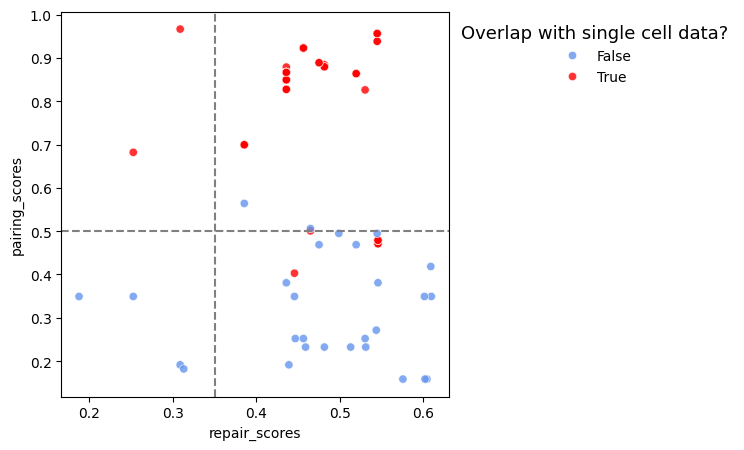

In [13]:
fig,ax=plt.subplots(figsize=(5, 5))
sns.scatterplot(data=all_data_analysis, x='repair_scores', y='pairing_scores',hue="Overlap with single cell data?", palette={True: "red", False: "cornflowerblue"},alpha=0.8,ax=ax)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title="Overlap with single cell data?", title_fontsize='13', fontsize='10', frameon=False)
plt.axvline(x=0.35, color='grey', linestyle='--')
plt.axhline(y=0.5, color='grey', linestyle='--')
plt.show()